# **Price Prediction of Houses in Bengaluru, India, Using a Linear Regression Model**

> *BY*

**DOUGLAS, Unyime-Abasi A.**

# **Sections:**

1. [**Exploring The Data**](#scrollTo=rABqp20Q76im&line=1&uniqifier=1)

2. [**Handling Missing Values**](#scrollTo=Ux5NNVN9qlP3&line=1&uniqifier=1)

3. [**Feature Processing**](#scrollTo=ZUqVDCunpzi2&line=1&uniqifier=1)

4. [**Removing Outliers**](#scrollTo=DTbhTFS-6H8j&line=1&uniqifier=1)

5. [**Model Building & Testing**](#scrollTo=0TE0xqUPKkXv&line=1&uniqifier=1)

# **Exploring The Data**

In [2]:
# Import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read file to df

df = pd.read_csv('../data/raw/Bengaluru_House_Data.csv')

# View random rows in the dataset
df.sample(10, random_state=22)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
3018,Super built-up Area,Ready To Move,Frazer Town,2 BHK,Asneren,1550,2.0,2.0,140.000
11123,Built-up Area,Ready To Move,Avalahalli,3 BHK,Sohea A,2045,3.0,2.0,108.000
10220,Built-up Area,Ready To Move,Remco Bhel Layout,2 BHK,NaN,1220,2.0,0.0,56.000
7704,Plot Area,Ready To Move,Hoysalanagar,6 Bedroom,NaN,1200,4.0,2.0,90.000
2798,Plot Area,Ready To Move,Tippenahalli,2 Bedroom,NaN,1200,2.0,0.0,55.000
3367,Super built-up Area,Ready To Move,Whitefield,4 BHK,T ZedZe,3537,5.0,3.0,210.000
3850,Built-up Area,Ready To Move,Nagaraja Garden,2 BHK,NaN,1256,2.0,1.0,62.800
10421,Built-up Area,Ready To Move,Manorayana Palya,2 Bedroom,NaN,1500,2.0,0.0,145.000
3521,Plot Area,Ready To Move,Kanaka Nagar,2 Bedroom,NaN,1200,2.0,1.0,125.000
7921,Super built-up Area,18-Mar,Sarjapur Road,3 BHK,PualeSk,1618 - 1929,NaN,NaN,85.125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**Observations:**

It is immediately visible that there are rows with missing values, most notably in the `balcony` and `society` columns

In [5]:
# View the percentage of missing values by columns

NaN_percentages = df.isna().sum() / len(df) * 100
NaN_percentages.sort_values(ascending=False)

,0
society,41.306306
balcony,4.572072
bath,0.548048
size,0.120120
location,0.007508
area_type,0.000000
availability,0.000000
total_sqft,0.000000
price,0.000000


**Observation:**

This confirms `society` and `balcony` columns as the columns with most missing values.

# **Handling Missing Values**

In [6]:
df.drop(['society'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [7]:
# Fill missing 'balcony' values with 0, assuming NaN means no balcony
df['balcony'] = df['balcony'].fillna(0)

# Ensure 'balcony' is an integer type
df['balcony'] = df['balcony'].astype(int)

In [8]:
# Fill missing value in location as 'other'

df['location'] = df['location'].fillna('other')

We're going to handle missing values in `size` and `bath` consecutively, with a simple logic:

- If a row has missing values in `size` and `bath`: drop the row

- If only `size` is `Null`: fill with # of bathrooms from `bath`

- If only `bath` is `Null`: fill with # of bedrooms from `size`

**Why?:**

We expect, on average, a bathroom for each bedroom in an apartment

In [9]:
# View size and bath columns where size is null

df[['size', 'bath']][df['size'].isna()]

,size,bath
579,NaN,NaN
1775,NaN,NaN
2264,NaN,NaN
2809,NaN,NaN
2862,NaN,NaN
5333,NaN,NaN
6423,NaN,NaN
6636,NaN,NaN
6719,NaN,NaN
7680,NaN,NaN


**Observation:**

All rows where `size` has missing values `bath` too has missing values

In [10]:
# Drop rows with missing values in size col

df.dropna(subset=['size'], inplace=True)

In [11]:
# View size and bath columns where bath is null

df[['size', 'bath']][df['bath'].isna()].head()

,size,bath
56,4 Bedroom,NaN
81,4 Bedroom,NaN
224,3 BHK,NaN
344,1 BHK,NaN
669,5 BHK,NaN


In order to properly fill the `bath` column, we'll need to convert `size` column to a numeric value

In [12]:
# Create a new bhk column for number of bedrooms

df['bhk'] = df['size'].apply(lambda x: x.split(' ')[0])
df['bhk'] = pd.to_numeric(df['bhk'], errors='raise')
df[['size', 'bath', 'bhk']].sample(10)

,size,bath,bhk
11758,5 BHK,5.0,5
8988,2 BHK,2.0,2
1647,2 BHK,2.0,2
4420,2 BHK,2.0,2
1210,2 BHK,2.0,2
10607,2 BHK,2.0,2
633,1 BHK,1.0,1
9000,1 BHK,1.0,1
10363,2 BHK,2.0,2
11579,3 BHK,3.0,3


We have properly created the `bhk` column.

Now, we can drop the `size` column and fill missing values in `bath`

In [13]:
df.drop('size', axis=1, inplace=True)
df['bath'] = df.apply(lambda row: row['bhk'] if pd.isna(row['bath']) else row['bath'], axis=1)
df['bath'] = df['bath'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13304 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13304 non-null  object 
 1   availability  13304 non-null  object 
 2   location      13304 non-null  object 
 3   total_sqft    13304 non-null  object 
 4   bath          13304 non-null  int64  
 5   balcony       13304 non-null  int64  
 6   price         13304 non-null  float64
 7   bhk           13304 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 935.4+ KB


# **Feature Processing**

In [14]:
print(f'# of unique entries under area_type: {df['area_type'].nunique()}\n')
df['area_type'].value_counts()

# of unique entries under area_type: 4



,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2009
Carpet Area,87


Let's make this simpler

In [15]:
area_type_mapping = {
    'Plot  Area': 'plot',
    'Super built-up  Area': 'super',
    'Built-up  Area': 'built',
    'Carpet  Area': 'carpet'
}

df['area_type'] = df['area_type'].map(area_type_mapping)
print(df['area_type'].value_counts(sort=True).to_string())

area_type
super     8790
built     2418
plot      2009
carpet      87


In [16]:
print(f'# of unique entries under availability: {df['availability'].nunique()}\n')
df['availability'].value_counts().head()

# of unique entries under availability: 80



,count
availability,
Ready To Move,10581
18-Dec,307
18-May,295
18-Apr,271
18-Aug,200


**Observation:**

We currently do not know how far apart these other days are from the present. This makes house availability to really have two categories:

- Those ready to move in: `Ready To Move`
- And those the client has to wait for (those with dates)

Let's organize this column with homes ready to move as `1`, and those that are not ready (entries with dates) as `0`

In [17]:
def process_availability(text):
    if text == 'Ready To Move':
        return 1
    else:
        return 0

df['availability'] = df['availability'].apply(process_availability)
df['availability'].value_counts()

,count
availability,
1,10581
0,2723


In [18]:
print(f'# of unique entries under location: {df['location'].nunique()}\n')
df['location'].value_counts().head()

# of unique entries under location: 1305



,count
location,
Whitefield,539
Sarjapur Road,397
Electronic City,302
Kanakpura Road,273
Thanisandra,234


In [19]:
df['location'].value_counts().tail()

,count
location,
Bennigana Halli,1
Prakruthi Township,1
"Banashankari 6th Stage ,Subramanyapura",1
"ravindra nagar, T.dasarahalli peenya",1
Rainbow Drive,1


**Observation:**

The location column has **high cardinality** with `1305` unique entries.

We begin the process of reducing the dimensionality of this column by:

- removing extra whitespaces and symbols `(' ', '.', ',')`
- grouping locations with low frequencies as `'other'`

In [20]:
# Clean location column by removing extra whitespaces and trailing ',' or '.'

df['location'] = (
    df['location']
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.strip()
   )

print(f'new # of unique entries under location: {df['location'].nunique()}')

new # of unique entries under location: 1271


In [21]:
# View number of locations with less than 10 counts

(df['location'].value_counts() <= 10).sum()

np.int64(1030)

In [22]:
# Group locations with counts <= 10 as 'other'

location_stats = df['location'].value_counts(ascending=False)

locations_more_than_10 = location_stats[location_stats>10]

df.location = df.location.apply(lambda x: x if x in locations_more_than_10 else 'other')
print(f'new # of unique entries under location: {df['location'].nunique()}')

new # of unique entries under location: 242


In [23]:
display(df.sample(10))
df.info()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
2092,super,0,ananth nagar,1109,2,1,60.00,2
5484,super,0,kanakpura road,700,2,1,34.99,2
9397,super,1,kanakpura road,1135,2,1,56.74,2
426,super,0,balagere,1590,3,2,79.00,3
9443,super,1,uttarahalli,1213,2,2,48.00,2
3082,super,0,chandapura,1185,2,2,30.22,3
10070,plot,1,seegehalli,2400,4,1,240.00,3
6099,super,1,other,1455,2,2,55.00,3
7143,super,0,whitefield,1173,2,1,78.20,2
6188,super,1,benson town,2850,4,3,470.00,3


<class 'pandas.core.frame.DataFrame'>
Index: 13304 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13304 non-null  object 
 1   availability  13304 non-null  int64  
 2   location      13304 non-null  object 
 3   total_sqft    13304 non-null  object 
 4   bath          13304 non-null  int64  
 5   balcony       13304 non-null  int64  
 6   price         13304 non-null  float64
 7   bhk           13304 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 935.4+ KB


**Observation:**

The `'total_sqft'` column has numbers but is recorded as an `object` or `string` data type.

In [24]:
'''This is an INTENTIONAL error
It shows total_sqft also contains non-numerical characters'''

df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='raise')

ValueError: Unable to parse string "2100 - 2850" at position 30

In [25]:
print(f'# of unique entries under total_sqft: {df['total_sqft'].nunique()}\n')
df['total_sqft'].value_counts().head()

# of unique entries under total_sqft: 2110



,count
total_sqft,
1200,843
1100,221
1500,204
2400,195
600,180


In [26]:
df['total_sqft'].value_counts().tail()

,count
total_sqft,
1778,1
2006.8,1
1922,1
888 - 1290,1
1413,1


**Observation:**

Some entries are not formated properly:

- some are ranges: `2249.81 - 4112.19`
- some are in other units: `Sq. Meters`, `Yards`, `Acres`, etc.

We want to view entries under `total_sqft` that are longer than what we expect: `xxxx.xx` (7 chars)

In [27]:
filtered_total_sqft = df['total_sqft'][df['total_sqft'].apply(lambda x: len(str(x)) > 7)]
filtered_total_sqft.value_counts().head()

,count
total_sqft,
2830 - 2882,5
2249.81 - 4112.19,3
3630 - 3800,3
645 - 936,2
613 - 648,2


**Observation:**

We have total area filled in other units too: 'Sq. Meter', 'Acres', 'Sq. Yards', 'Guntha', 'Cents', 'Grounds', 'Perch'

Most of these represent land plots rather than house areas, e.g., 5.31Acres is 231,303.60Sq. Ft

We will a function to extract numbers in the `total_sqft` column, find the average if it's a range like `1250 - 1305`, and ignore areas in other specified units

In [28]:
import re

def convert_sqft_to_num(text):
    if not isinstance(text, str):
        return None

    text_lower = text.lower().strip()

    # Try to convert to a single float (e.g., '1200')
    try:
        return float(text_lower)
    except ValueError:
        pass  # Not a simple float, continue to check other formats

    # Check if it's a range (e.g., '1000-1200')
    if '-' in text_lower:
        parts = [p.strip() for p in text_lower.split('-')]
        if len(parts) == 2:
            try:
                num1 = float(parts[0])
                num2 = float(parts[1])
                return (num1 + num2) / 2
            except ValueError:
                return None

    # If neither a simple number nor a valid range it must be in another unit
    return None

In [29]:
# Apply new function and drop created NaN values

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.dropna(subset=['total_sqft'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13258 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13258 non-null  object 
 1   availability  13258 non-null  int64  
 2   location      13258 non-null  object 
 3   total_sqft    13258 non-null  float64
 4   bath          13258 non-null  int64  
 5   balcony       13258 non-null  int64  
 6   price         13258 non-null  float64
 7   bhk           13258 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 932.2+ KB


**Observation:**

We can see `total_sqft` has been successfully converted to a numeric column

In [30]:
# Temporarily drop availability to describe other numeric columns

df.drop(columns=['availability']).describe()

,total_sqft,bath,balcony,price,bhk
count,13258.000000,13258.000000,13258.000000,13258.000000,13258.000000
mean,1558.812282,2.693468,1.515236,112.469985,2.802685
std,1238.432276,1.338141,0.862651,149.087270,1.292070
min,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1275.000000,2.000000,2.000000,72.000000,3.000000
75%,1680.000000,3.000000,2.000000,120.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,43.000000


**Observation:**

The minimum `(1)` and maximum `(52,272)` under `total_sqft` may be outliers.

We will be handling outliers next

# **Removing Outliers**

In [31]:
# View counts of unique entries in bhk column

print(df.bhk.value_counts().to_string())

bhk
2     5518
3     4843
4     1412
1      647
5      352
6      220
7      100
8       88
9       52
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1


In [32]:
# View percentage

bhk_percentages = df.bhk.value_counts(normalize=True) * 100
print(bhk_percentages.to_string())

bhk
2     41.620154
3     36.528888
4     10.650173
1      4.880072
5      2.655001
6      1.659375
7      0.754262
8      0.663750
9      0.392216
10     0.105597
11     0.030170
27     0.007543
19     0.007543
16     0.007543
43     0.007543
14     0.007543
12     0.007543
13     0.007543
18     0.007543


In [33]:
# Drop bhk entries with count less than 5

bhk_stats = df['bhk'].value_counts(ascending=False)

bhks_less_than_5 = bhk_stats[bhk_stats<5]

df.bhk = df.bhk.apply(lambda x: np.nan if x in bhks_less_than_5 else x)
df.dropna(subset=['bhk'], inplace=True)
print(f'new value count: {df.bhk.value_counts().to_string()}')

new value count: bhk
2.0     5518
3.0     4843
4.0     1412
1.0      647
5.0      352
6.0      220
7.0      100
8.0       88
9.0       52
10.0      14


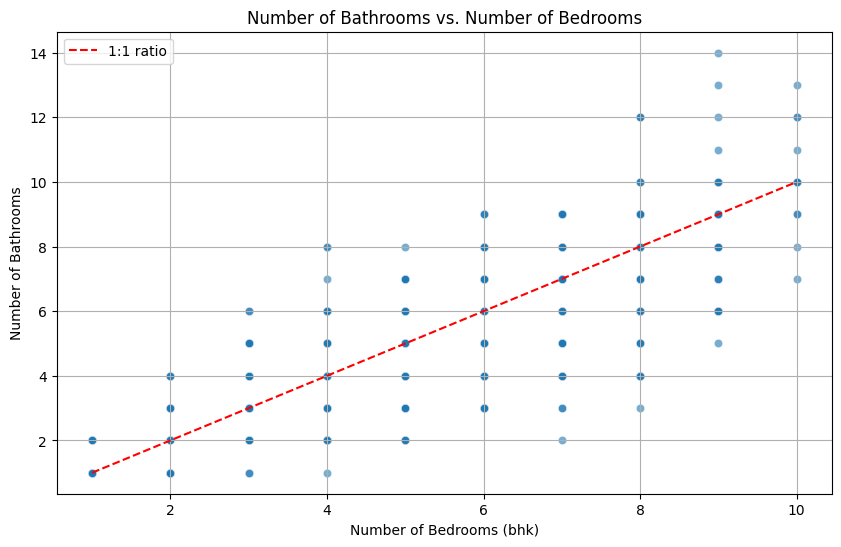

In [34]:
# View number of baths for each bhk

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bhk', y='bath', data=df, alpha=0.6)
plt.plot([df['bhk'].min(), df['bhk'].max()], [df['bhk'].min(), df['bhk'].max()], 'r--', label='1:1 ratio')
plt.title('Number of Bathrooms vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms (bhk)')
plt.ylabel('Number of Bathrooms')
plt.legend()
plt.grid(True)
plt.show()

**Observation:**

We see some suspicious combinations, like an 8 bhk with 3 or 4 baths, and 7 bhk with 2 baths.

Some of these are more hostel-like accomodations than houses

We expect the number of bathrooms from `bath` to be relatively close to the number of bedrooms from `bhk`.

Any house with more than 2 baths per bhk or less than 2 will be suspicious

In [35]:
# Count outliers before filtering
num_outliers = (abs(df['bath'] - df['bhk']) > 2).sum()
print(f'{num_outliers} rows identified as outliers based on |bath - bhk| > 2')

# Filter out the outliers
df = df[abs(df['bath'] - df['bhk']) <= 2]

print(f'New DataFrame shape after filtering: {df.shape}')

63 rows identified as outliers based on |bath - bhk| > 2
New DataFrame shape after filtering: (13183, 8)


In [36]:
df.describe()

,availability,total_sqft,bath,balcony,price,bhk
count,13183.000000,13183.000000,13183.000000,13183.000000,13183.000000,13183.000000
mean,0.794281,1554.590627,2.668816,1.517712,111.216116,2.769931
std,0.404242,1229.738993,1.219750,0.859921,142.988663,1.149670
min,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1.000000,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1.000000,1275.000000,2.000000,2.000000,71.000000,3.000000
75%,1.000000,1674.000000,3.000000,2.000000,120.000000,3.000000
max,1.000000,52272.000000,12.000000,3.000000,2912.000000,10.000000


**Observation:**

Our `total_sqft` and `price` columns still look heavily skewed.

A `Linear Regression Model` works best with `Normalized` data. We can normalize these columns using the `Z-Score` method.

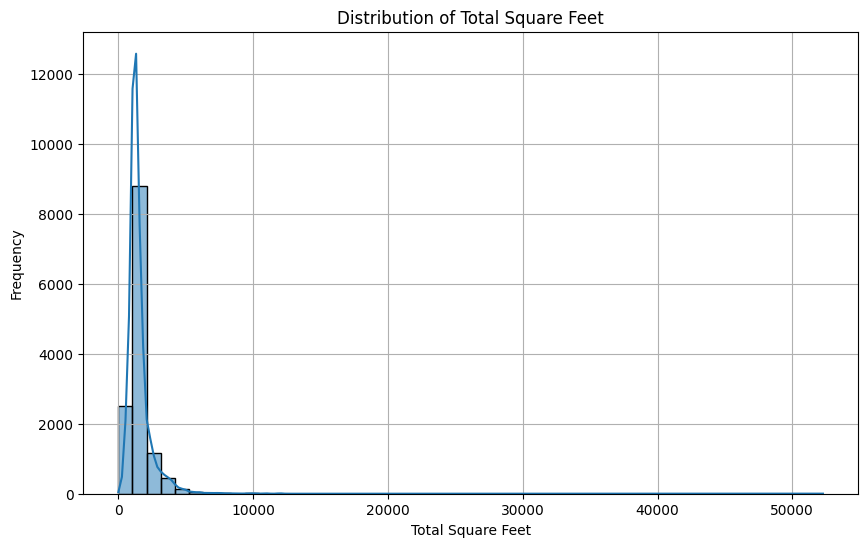

In [37]:
# Visualize distribution of total_sqft

plt.figure(figsize=(10, 6))
sns.histplot(df['total_sqft'], kde=True, bins=50)
plt.title('Distribution of Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Observation:**

The data is highly skewed to the right

In [38]:
# Define z-score function for normalizing and removing outliers

def zscore_outliers(df, col):
    df_out = pd.DataFrame()
    m = np.mean(df[col])
    st = np.std(df[col])
    df_out = df[(df[col]>=(m-3*st)) & (df[col]<=(m+3*st))]
    return df_out

In [39]:
# Apply new function to total_sqft to normalize data

df = zscore_outliers(df, 'total_sqft')
df.shape

(13072, 8)

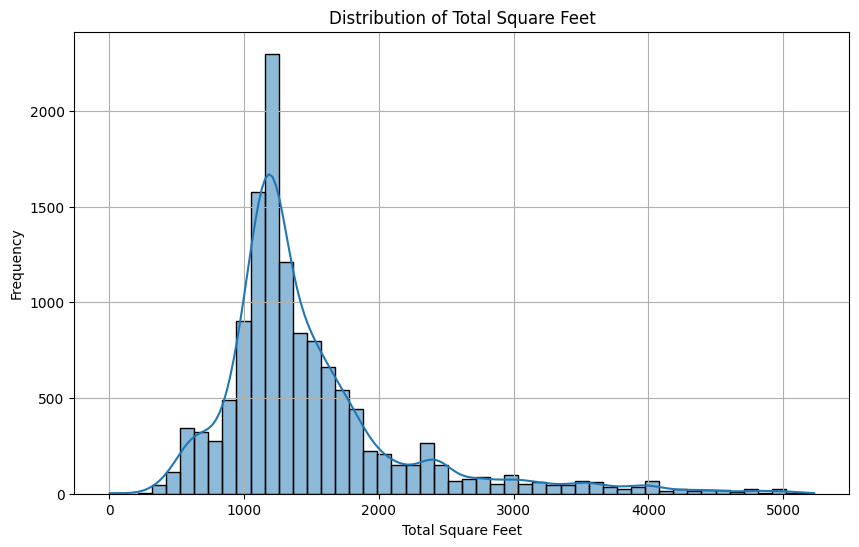

In [40]:
# Visualize distribution of total_sqft after normalizing

plt.figure(figsize=(10, 6))
sns.histplot(df['total_sqft'], kde=True, bins=50)
plt.title('Distribution of Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Observation:**

The data is better normalized. Larger values in `total_sqft` may be due to `area_type` and number of bedroooms `(bhk)`

We repeat this process to normalize the `price` column

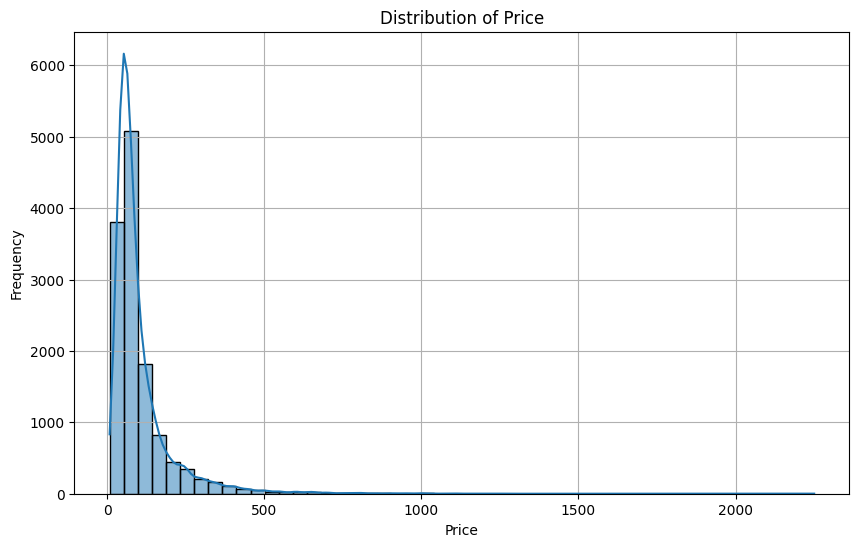

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Observation:**

Once again, the data is heavily right-skewed

In [42]:
# Apply z-score function to price

df = zscore_outliers(df, 'price')
df.shape

(12804, 8)

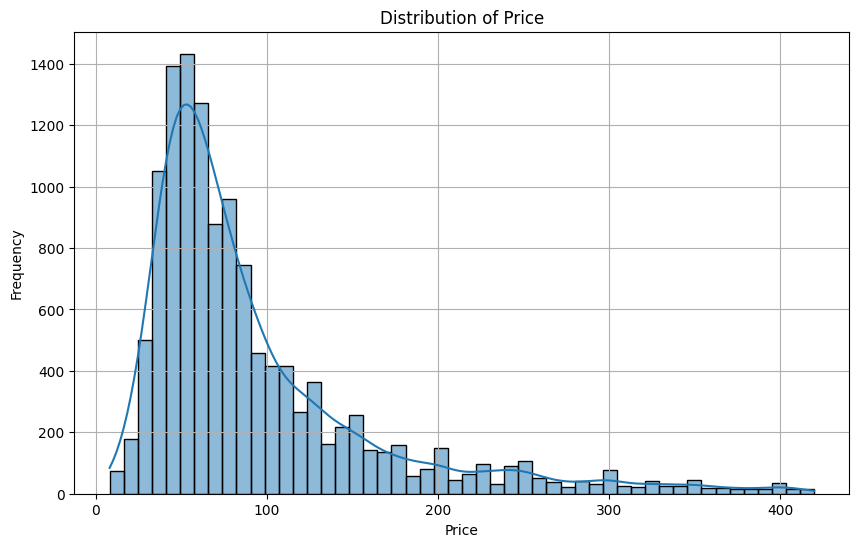

In [43]:
# Visualize price distribution after normalization

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Observation:**

The data is also better normalized, and higher prices may be due to `location` and other features

**Next** we create a new column `sqft_per_bhk` which shows the `total_sqft` per number of bedrooms `(bhk)`

In [44]:
df['sqft_per_bhk'] = df['total_sqft'] / df['bhk']
df.sqft_per_bhk.describe()

,sqft_per_bhk
count,12804.000000
mean,553.428647
std,171.810898
min,0.250000
25%,472.500000
50%,550.000000
75%,620.000000
max,3820.000000


**Observation:**

A value of `0.25` is an outlier. The industry standard is at the least 300 sqft per bhk

In [45]:
# Count outliers before filtering
num_outliers = (df.sqft_per_bhk < 300).sum()
print(f'{num_outliers} rows identified as outliers based on sqft_per_bhk < 300')

# Filter out the outliers
df = df[df.sqft_per_bhk >= 300]

print(f'New DataFrame shape after filtering: {df.shape}')

691 rows identified as outliers based on sqft_per_bhk < 300
New DataFrame shape after filtering: (12113, 9)


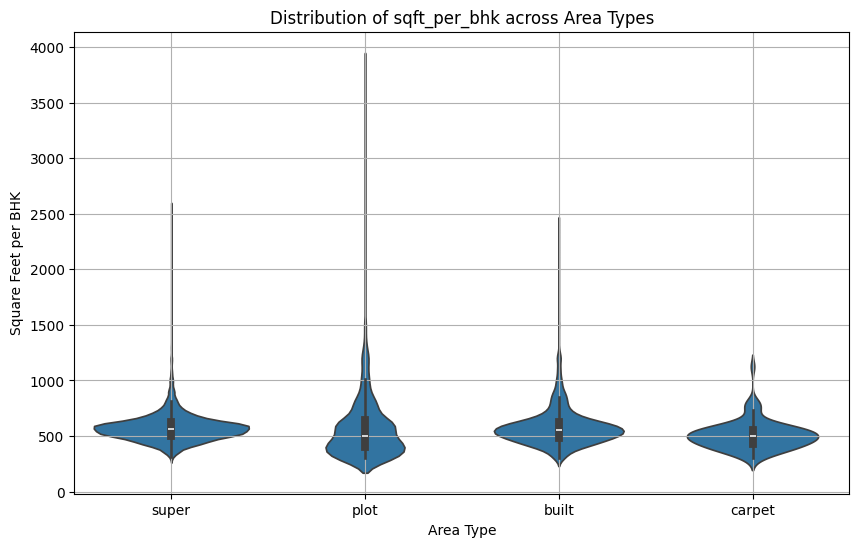

In [46]:
# Visualize distribution of sqft_per_bhk across each area_type

plt.figure(figsize=(10, 6))
sns.violinplot(x='area_type', y='sqft_per_bhk', data=df)
plt.title('Distribution of sqft_per_bhk across Area Types')
plt.xlabel('Area Type')
plt.ylabel('Square Feet per BHK')
plt.grid(True)
plt.show()

In [47]:
df.groupby(['area_type'])['sqft_per_bhk'].describe()

,count,mean,std,min,25%,50%,75%,max
area_type,,,,,,,,
built,2272.0,578.891222,166.363705,300.0,480.000000,550.0,628.000000,2400.0
carpet,80.0,508.562885,128.179699,300.0,431.521667,500.0,554.875000,1125.0
plot,1173.0,564.449113,268.896866,300.0,400.000000,500.0,647.333333,3820.0
super,8588.0,574.458421,124.185224,300.0,500.000000,564.0,625.000000,2559.0


**Observation:**

As expected for each `area_type` there is a unique variance in the `sqft_per_bhk`. With `plot` types having larger values and `carpet` types having the least max values

In [48]:
# Define function for normalizing and removing outliers using iqr

def remove_iqr_outliers(df, group, col):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby(group):
        Q1 = subdf[col].quantile(0.25)
        Q3 = subdf[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        reduced_df = subdf[(subdf[col] >= lower_bound) & (subdf[col] <= upper_bound)]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [49]:
# Normalize sqft_per_bhk by area_type removing outliers

df = remove_iqr_outliers(df, 'area_type', 'sqft_per_bhk')
df.shape

(11530, 9)

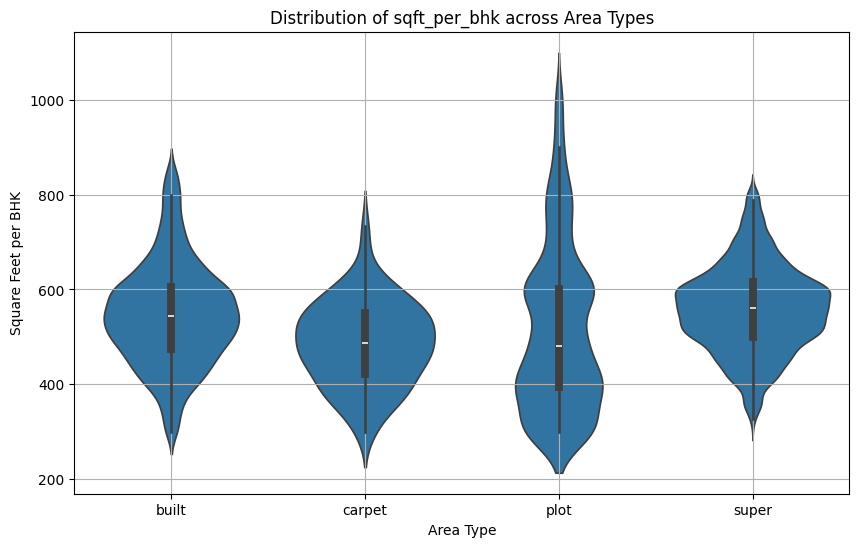

In [50]:
# Visualize distribution after normalization

plt.figure(figsize=(10, 6))
sns.violinplot(x='area_type', y='sqft_per_bhk', data=df)
plt.title('Distribution of sqft_per_bhk across Area Types')
plt.xlabel('Area Type')
plt.ylabel('Square Feet per BHK')
plt.grid(True)
plt.show()

**Next** we create a new column `price_per_sqft` which shows the `price` per `total_sqft`

In [51]:
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']
df.price_per_sqft.describe()

,price_per_sqft
count,11530.000000
mean,5861.377575
std,2834.738849
min,500.000000
25%,4166.666667
50%,5176.565008
75%,6627.160233
max,44000.000000


In [52]:
# Create a dataframe for top 10 locations

top_locations = df['location'].value_counts(sort=True).head(10)

df_top_locations = df[df['location'].isin(top_locations.index)]

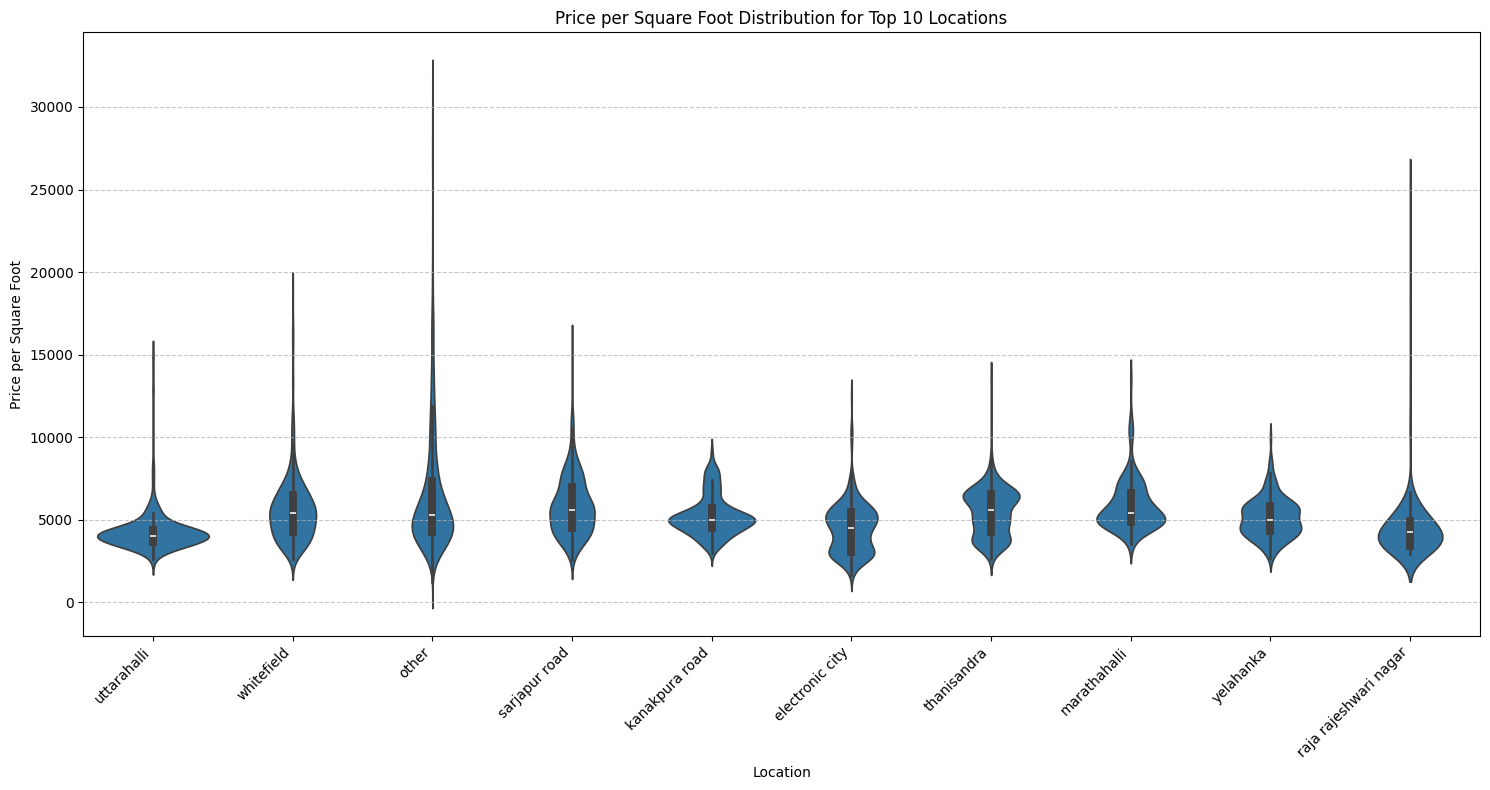

In [53]:
# Visualize price_per_sqft for these top locations

plt.figure(figsize=(15, 8))
sns.violinplot(x='location', y='price_per_sqft', data=df_top_locations)
plt.title('Price per Square Foot Distribution for Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Price per Square Foot')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
# Define function for normalizing and removing extreme values using 1 std

def remove_outliers(df, group, col):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby(group):
        m = np.mean(subdf[col])
        st = np.std(subdf[col])
        reduced_df = subdf[(subdf[col]>=(m-st)) & (subdf[col]<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

**Before** identifying extreme values in `price_per_sqft` by `location`, we need to ensure each location is properly represented

Once again, we'll filter locations with low counts as `other`.

In [55]:
location_stats = df['location'].value_counts(ascending=False)

locations_more_than_5 = location_stats[location_stats>5]

df.location = df.location.apply(lambda x: x if x in locations_more_than_5 else 'other')
print(f'new # of unique entries under location: {df['location'].nunique()}')

new # of unique entries under location: 239


In [56]:
# Normalize price_per_sqft by location removing extreme values

df = remove_outliers(df, 'location', 'price_per_sqft')

df.describe()

,availability,total_sqft,bath,balcony,price,bhk,sqft_per_bhk,price_per_sqft
count,9068.000000,9068.000000,9068.000000,9068.000000,9068.000000,9068.000000,9068.000000,9068.000000
mean,0.786723,1383.434862,2.390935,1.553154,76.757485,2.515439,554.405720,5370.398875
std,0.409645,500.067608,0.850144,0.816545,44.775139,0.811223,98.809368,1698.333559
min,0.000000,300.000000,1.000000,0.000000,10.000000,1.000000,300.000000,2090.909091
25%,1.000000,1100.000000,2.000000,1.000000,48.122500,2.000000,492.000000,4237.041470
50%,1.000000,1260.000000,2.000000,2.000000,65.000000,2.000000,552.500000,5072.463768
75%,1.000000,1571.000000,3.000000,2.000000,90.000000,3.000000,611.125000,6173.107890
max,1.000000,5100.000000,12.000000,3.000000,415.000000,10.000000,1012.750000,18750.000000


In [57]:
# Finally we drop duplicates which can affect our model

print(f'Shape before dropping duplicates: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Shape after dropping duplicates: {df.shape}')

Shape before dropping duplicates: (9068, 10)
Shape after dropping duplicates: (8461, 10)


# **Model Building & Testing**

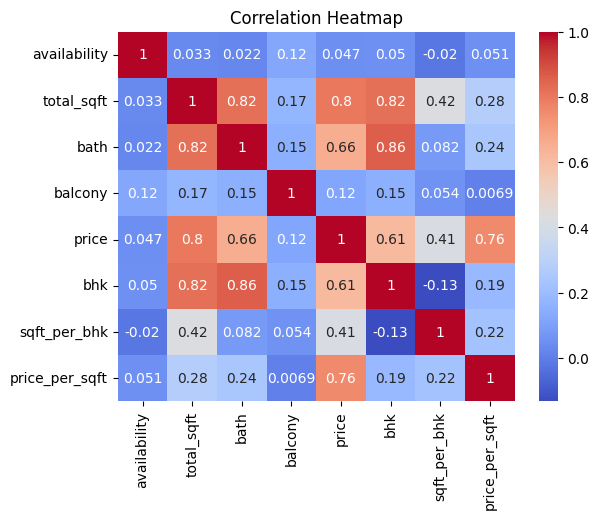

In [58]:
# View correlation for feature selection

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observation:**

- `total_sqft` seems to be the strongest determinar of `price` `(~0.8)` for a given `location` and `area_type`

- The low correlation `(approximately 0)` between `availability` and `balcony` with `price` shows these features are not strong predictors for our model.

- Also, there is high collinearity between `bath` and `bhk` `(~0.9)`. This means one can be effectively dropped to optimize the performance of our model

In [59]:
df.drop(columns=['availability', 'bath', 'balcony', 'sqft_per_bhk', 'price_per_sqft'], inplace=True)

In [60]:
# Apply one-hot encoding to categorical columns

df = pd.get_dummies(df, columns=['area_type', 'location'], prefix=['area_type', 'location'], drop_first=True, dtype=int)
df.head()

,total_sqft,price,bhk,area_type_carpet,area_type_plot,area_type_super,location_1st phase jp nagar,location_2nd phase judicial layout,location_2nd stage nagarbhavi,location_5th block hbr layout,...,location_vijayanagar,location_vishveshwarya layout,location_vishwapriya layout,location_vittasandra,location_whitefield,location_yelachenahalli,location_yelahanka,location_yelahanka new town,location_yelenahalli,location_yeshwanthpur
0,1200.0,130.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,194.0,3.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,235.0,3.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1235.0,148.0,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1500.0,85.0,5.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X = df.drop(columns=['price']) # Features dataframe
y = df['price'] # Target variable

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (8461, 243)
y shape: (8461,)


In [62]:
# Split data for training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (6768, 243)
X_test shape: (1693, 243)
y_train shape: (6768,)
y_test shape: (1693,)


In [63]:
# Train Linear Regression Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)

print('First 5 Predictions:\n')
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(results_df.head())

First 5 Predictions:



,Actual,Predicted
4368,75.0,75.855099
4270,79.0,80.000987
7022,85.0,77.836469
3995,78.0,80.529049
1902,41.0,51.847011


In [65]:
# Evaluate model's performance

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 406.01
Root Mean Squared Error (RMSE): 20.15
R-squared (R2) Score: 0.80
Mean Absolute Error (MAE): 13.21
Mean Absolute Percentage Error (MAPE): 17.96%


Our `Linear Regression` model is successfully built and applied to our clean dataset

**Next** we visualize the `actual` and `predicted` price-values based on the strongest determinar of `price` from our correlation heatmap: `total_sqft`

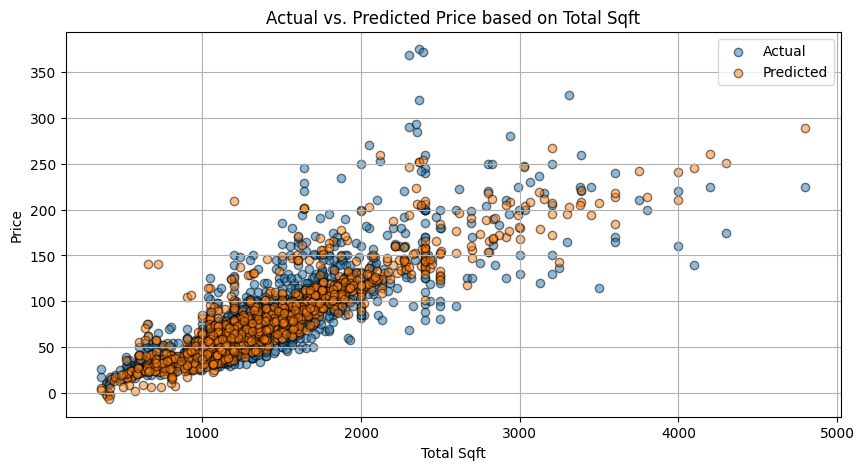

In [66]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['total_sqft'], y_test, alpha=0.5, edgecolor='k', label='Actual')
plt.scatter(X_test['total_sqft'], y_pred, alpha=0.5, edgecolor='k', label='Predicted')
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Price based on Total Sqft")
plt.legend()
plt.grid(True)
plt.show()

We can also evaluate the model's accuracy using the `K-Fold` cross-validation method. This method ensures all parts of the data is used for both training and testing.

In [67]:
from sklearn.model_selection import KFold

# Initialize K-Fold Cross-Validation using 5 splits

kf = KFold(n_splits=5, shuffle=True, random_state=70)
mse_scores = []
rmse_scores = []
r2_scores = []
mae_scores = []
mape_scores = []

# Iterate through each fold

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)

    # Evaluate metrics
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_fold, y_pred_fold)
    mae = mean_absolute_error(y_test_fold, y_pred_fold)
    mape = mean_absolute_percentage_error(y_test_fold, y_pred_fold) * 100

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mape_scores.append(mape)

print("K-Fold Cross-Validation Results:\n")
print(f"Mean MSE: {np.mean(mse_scores):.2f} (Std: {np.std(mse_scores):.2f})")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f} (Std: {np.std(rmse_scores):.2f})")
print(f"Mean R2 Score: {np.mean(r2_scores):.2f} (Std: {np.std(r2_scores):.2f})")
print(f"Mean MAE: {np.mean(mae_scores):.2f} (Std: {np.std(mae_scores):.2f})")
print(f"Mean MAPE: {np.mean(mape_scores):.2f}% (Std: {np.std(mape_scores):.2f}%)")

K-Fold Cross-Validation Results:

Mean MSE: 384.53 (Std: 14.78)
Mean RMSE: 19.61 (Std: 0.38)
Mean R2 Score: 0.81 (Std: 0.01)
Mean MAE: 12.92 (Std: 0.17)
Mean MAPE: 17.79% (Std: 0.39%)


**Finally,** we can apply our model for evaluating house prices for specified features

In [68]:
# Define price prediction function

def predict_price(location, area_type, total_sqft, bhk):
    lr = LinearRegression()
    lr.fit(X, y)

    # Create a zero array representing the input features for the model
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bhk

    area_type_col_name = f'area_type_{area_type.lower().strip()}'
    if area_type_col_name in X.columns:
        area_index = np.where(X.columns == area_type_col_name)[0][0]
        x[area_index] = 1
    # If an unknown area_type is provided, its one-hot encoded column will remain 0, which is fine.

    location_col_name = f'location_{location.lower().strip()}'
    if location_col_name in X.columns:
        loc_index = np.where(X.columns == location_col_name)[0][0]
        x[loc_index] = 1
    else:
        # If the provided location is not one of the model's known locations,
        # it defaults to the 'other' category.
        other_loc_col_name = 'location_other'
        other_loc_index = np.where(X.columns == other_loc_col_name)[0][0]
        x[other_loc_index] = 1

    return lr.predict([x])[0]

In [69]:
print(predict_price(location='frazer town', area_type='super', total_sqft=1550, bhk=2))

162.3750931477539


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
print(predict_price(location='avalahalli', area_type='built', total_sqft=2045, bhk=3))

118.98802156721666


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [71]:
print(predict_price(location='whitefield', area_type='super', total_sqft=3537, bhk=4))

218.2841750645659


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Sections:**

1. [**Exploring The Data**](#scrollTo=rABqp20Q76im&line=1&uniqifier=1)

2. [**Handling Missing Values**](#scrollTo=Ux5NNVN9qlP3&line=1&uniqifier=1)

3. [**Feature Processing**](#scrollTo=ZUqVDCunpzi2&line=1&uniqifier=1)

4. [**Removing Outliers**](#scrollTo=DTbhTFS-6H8j&line=1&uniqifier=1)

5. [**Model Building & Testing**](#scrollTo=0TE0xqUPKkXv&line=1&uniqifier=1)